In [ ]:
from PIL import Image
import json

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.04 MiB | 20.25 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [ ]:
!mkdir signatures

In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:875:33: warning: c

In [ ]:
!cp /content/drive/MyDrive/YOLOv4/yolov4-obj.cfg ./cfg

In [ ]:
!cp /content/drive/MyDrive/YOLOv4/obj.names ./data
!cp /content/drive/MyDrive/YOLOv4/obj.data  ./data

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv     64       1 x 1/ 1    208 x 208

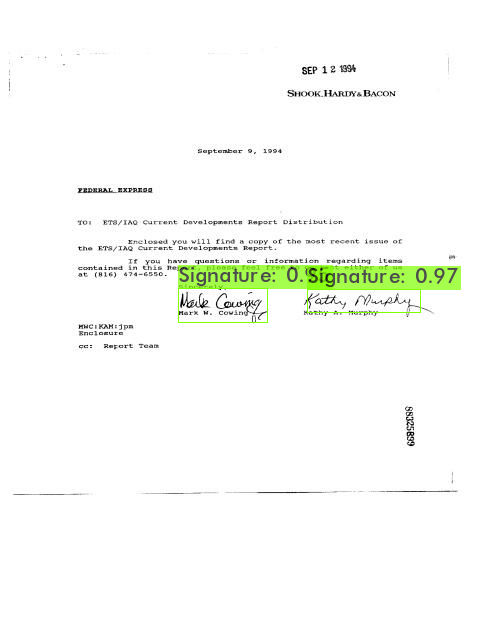

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /content/drive/MyDrive/YOLOv4/backup/yolov4-obj_2000.weights /content/drive/MyDrive/YOLOv4/multiple-signs.jpg -dont_show -ext_output -thresh 0.3 -out result.json
im = Image.open('predictions.jpg')
im

In [ ]:
results = open("/content/darknet/result.json")
res = json.load(results)
img_width, img_height = im.size
arr = []
for i in range(len(res[0]['objects'])):
  if res[0]['objects'][i]['class_id'] == 1:
    center_x = res[0]['objects'][i]['relative_coordinates']['center_x']
    center_y = res[0]['objects'][i]['relative_coordinates']['center_y']
    width = res[0]['objects'][i]['relative_coordinates']['width']
    height = res[0]['objects'][i]['relative_coordinates']['height']
    confidence = res[0]['objects'][i]['confidence']
    
    l = int((center_x - width / 2) * img_width)
    r = int((center_x + width / 2) * img_width)
    t = int((center_y - height / 2) * img_height)
    b = int((center_y + height / 2) * img_height)
    if l < 0:
        l = 0
    if r > img_width - 1:
        r = img_width - 1
    if t < 0:
        t = 0
    if b > img_height - 1:
        b = img_height - 1
    arr.append((l,t,r,b))

for i in range(len(arr)):
  im1 = im.crop(arr[i])
  im1.save('/content/signatures/signature'+str(i)+'.jpg')

In [ ]:
%cd ..
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
!pip install -r /content/pytorch-CycleGAN-and-pix2pix/requirements.txt

/content
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 30.23 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.
     |████████████████████████████████| 676 kB 8.0 MB/s 
     |████████████████████████████████| 1.7 MB 26.9 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 144 kB 58.4 MB/s 
     |████████████████████████████████| 181 kB 51.9 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=5f5344b4a9d8903d9d742effae32adab98b0c703f7127f25c04d96df7f344b3c
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=47b63589b19620cf023ebd1df3cac3b022

In [ ]:
!mkdir clean_signs

In [ ]:
import os
thumb_width = 300
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result
        
def resize_images(path):
    ''' Function to resize the images to the ip format for gans. '''
    dirs = os.listdir(path)
    for item in dirs:
      # print(path+'/'+item)
      if os.path.isfile(path+'/'+item):
        # print(path+'/'+item)
        im = Image.open(path+'/'+item)
        im_thumb = expand2square(im, (0, 0, 0)).resize((thumb_width, thumb_width), Image.LANCZOS)
        im_thumb.save(path+'/'+item, quality=100)


resize_images('/content/signatures')

In [ ]:
# im = Image.open('/content/signatures/signature0.jpg')
# thumb_width = 200
# im_thumb = expand2square(im, (0, 0, 0)).resize((thumb_width, thumb_width), Image.LANCZOS)
# im_thumb.save('/content/signatures/signature0new.jpg', quality=100)

In [ ]:
!mkdir /content/pytorch-CycleGAN-and-pix2pix/checkpoints/
!mkdir /content/pytorch-CycleGAN-and-pix2pix/checkpoints/gan_signdata_kaggle/

In [ ]:
cp /content/drive/MyDrive/gan_signdata_kaggle/backup/gan_signdata_kaggle/latest_net_G_B.pth  /content/pytorch-CycleGAN-and-pix2pix/checkpoints/gan_signdata_kaggle/latest_net_G.pth

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py --dataroot /content/signatures --name gan_signdata_kaggle --model test --no_dropout --results_dir /content/clean_signs --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/checkpoints --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/signatures           	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics.pairwise import cosine_similarity
import os

In [ ]:
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/kaggle_sign_data/saved_models1/vgg_finetuned_model')
feature_extractor = tf.keras.Sequential(vgg_model.layers[:-1])

In [ ]:
# def load_image(image_path):
#     '''Return the image in the format required by VGG16 model.'''
#     img = image.load_img(image_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)

#     return x

# def extract_features(paths):
#     '''Returns the features extracted by the model.'''
#     feature_list = []
#       features = {}
#       features['anchor'] = feature_extractor.predict(load_image(paths[images]))
#       features['compare'] = feature_extractor.predict(load_image(paths[images+1]))
#       feature_list.append(features)
#     return feature_list

# def cosine_similarity_fn(feature_list):
#     '''Returns the cosine similarity between the two signature images.'''
#     score = []
#     for path in feature_list:
#       score.append(cosine_similarity(path['compare'], path['anchor'])[0][0])
#     return score

In [ ]:
# root = '/content/clean_signs/gan_signdata_kaggle/test_latest/images'
# image_set = []
# directories = sorted(os.listdir(root))

# # for directory in directories:
# #   print(directory)
# #   current_root = os.path.join(root, directory)
# #   image_set.append([os.path.join(current_root, img) for img in sorted(os.listdir(current_root))])

# for images in directories:
#   image_set.append(os.path.join(root, images))

# print(image_set[0:2])
# from tensorflow.keras.preprocessing import image
# feature_set = extract_features(image_set[0:2])
# cosine_similarities = cosine_similarity_fn(feature_set)

['/content/clean_signs/gan_signdata_kaggle/test_latest/images/signature0_fake.png', '/content/clean_signs/gan_signdata_kaggle/test_latest/images/signature0_real.png']


IndexError: ignored

In [ ]:
def load_image(image_path):
    '''Return the image in the format required by VGG16 model.'''
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    return x

def extract_features(paths):
    '''Returns the features extracted by the model.'''
    feature_list = []
    for images in paths:
        features = {}
        features['anchor'] = feature_extractor.predict(load_image(images[0]))
        features['compare'] = feature_extractor.predict(load_image(images[1]))
        feature_list.append(features)
        
    return feature_list

def cosine_similarity_fn(feature_list):
    '''Returns the cosine similarity between the two signature images.'''
    score = []
    for path in feature_list:
      score.append(cosine_similarity(path['compare'], path['anchor'])[0][0])
    return score

In [ ]:
root = '/content/images'
image_set = []
directories = sorted(os.listdir(root))

for directory in directories:
    current_root = os.path.join(root, directory)
    image_set.append([os.path.join(current_root, img) for img in sorted(os.listdir(current_root))])

print(image_set)
feature_set = extract_features(image_set[1:])
cosine_similarities = cosine_similarity_fn(feature_set)

[[], ['/content/images/0/signature0_fake.png', '/content/images/0/signature0_real.png'], ['/content/images/1/signature1_fake.png', '/content/images/1/signature1_real.png']]


In [ ]:
root = '/content/images'
image_set = []
directories = sorted(os.listdir(root))

for directory in directories:
    current_root = os.path.join(root, directory)
    image_set.append([os.path.join(current_root, img) for img in sorted(os.listdir(current_root))])

print(image_set)
feature_set = extract_features(image_set[1:])
cosine_similarities = cosine_similarity_fn(feature_set)

[[], ['/content/images/2/signature0_fake.png', '/content/images/2/signature1_fake.png']]


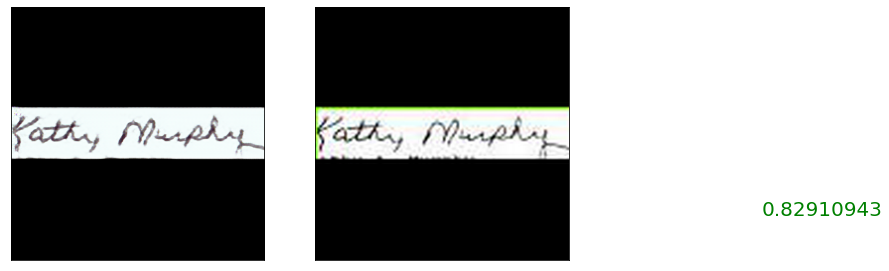

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 6))
axs[0].imshow(plt.imread(image_set[1][0]))
axs[1].imshow(plt.imread(image_set[1][1]))
axs[1].text(450, 210, cosine_similarities[0],fontsize = 20, color ="green")
for i in range(2):
  axs[i].set_xticks([]) 
  axs[i].set_yticks([]) 

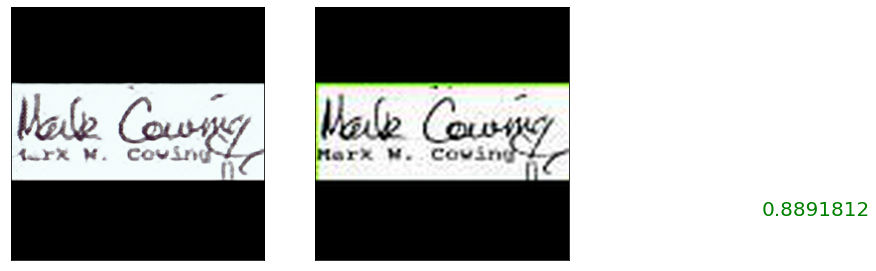

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 6))
axs[0].imshow(plt.imread(image_set[2][0]))
axs[1].imshow(plt.imread(image_set[2][1]))
axs[1].text(450, 210, cosine_similarities[1],fontsize = 20, color ="green")
for i in range(2):
  axs[i].set_xticks([]) 
  axs[i].set_yticks([]) 

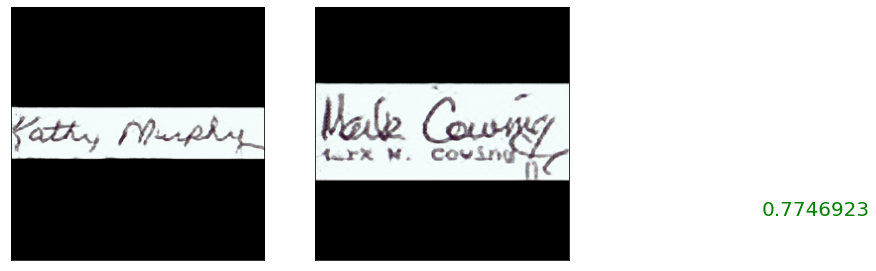

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 6))
axs[0].imshow(plt.imread(image_set[1][0]))
axs[1].imshow(plt.imread(image_set[1][1]))
axs[1].text(450, 210, cosine_similarities[0],fontsize = 20, color ="green")
for i in range(2):
  axs[i].set_xticks([]) 
  axs[i].set_yticks([]) 